In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/loan - loan.csv')
data.head()
cpy_data = data

# To display maximum rows and columns
# pd.set_option('max_columns',None)
# pd.set_option('max_rows',None)

In [3]:
# Number of rows and columns in dataset
rows,columns = data.shape
print(f'Dataset has {rows} rows and {columns} columns.')

Dataset has 39717 rows and 111 columns.


In [4]:
# looping to find the number of categorical and numerical features
num , obj = 0,0
for feature in data.columns:
  if data.dtypes[feature] != 'O':
    num+=1
  else:
    obj+=1
print('NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:')
print(f'There are {num} numerical features and {obj} categorical features')

NUMBER OF NUMERICAL AND CATEGORICAL FEATURES:
There are 87 numerical features and 24 categorical features


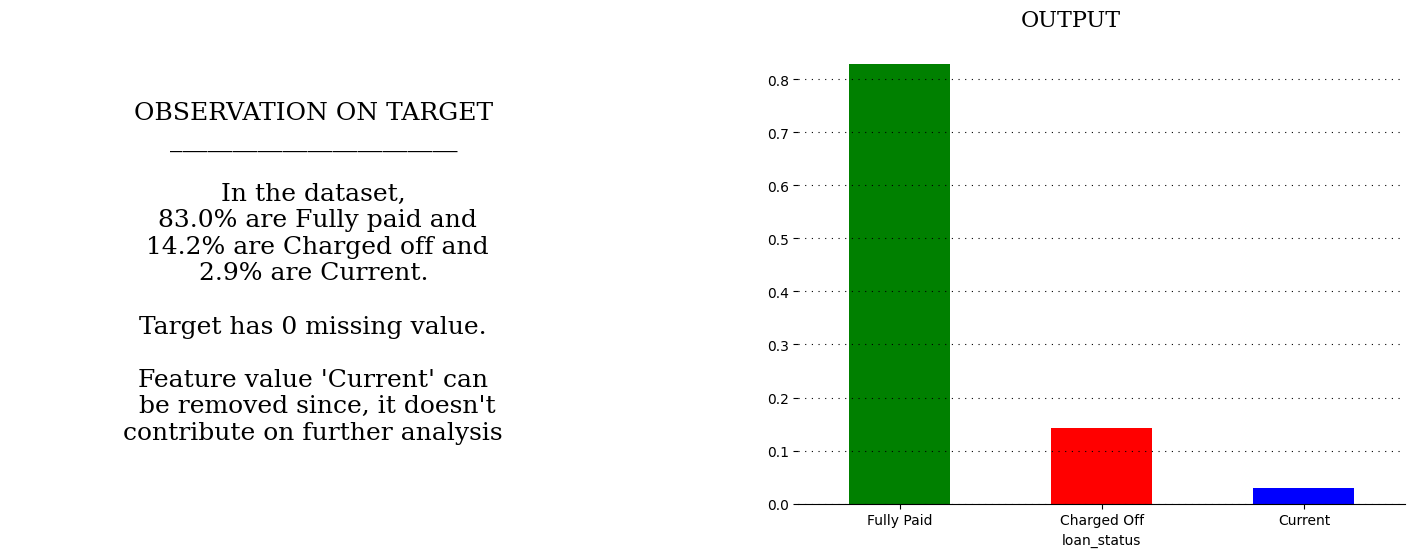

In [5]:
# Visualization on target feature
# creating a plot structure
fig = plt.figure(figsize = (18,6))
spec = fig.add_gridspec(1,2)
spec.update(wspace = 0.3, hspace = 0.15)
sec_1 = fig.add_subplot(spec[0,0])
sec_2= fig.add_subplot(spec[0,1])

# Adding color preference
bg_color = 'white'
for selection in [fig, sec_1, sec_2]:
  selection.set_facecolor(bg_color)

# plotting graph
data['loan_status'].value_counts(normalize = True).plot.bar(color=['green','red','blue'])
sec_2.grid(color = '#000000',linestyle=':',axis = 'y',zorder = 0, dashes = (1,5))
plt.xticks(rotation = 0)
sec_2.text(0.6,0.9,'OUTPUT',fontsize = 16,fontfamily = 'serif')

# Number of missing values
m_vals = data['loan_status'].isnull().sum()

# Narrating the observation
Max , Med, Min = data['loan_status'].value_counts(normalize = True)*100
Max = np.round(Max, 1)
Med = np.round(Med, 1)
Min = np.round(Min, 1)

sec_1.text(0.5,0.5,f"OBSERVATION ON TARGET\n_______________________\n\nIn the dataset,\n {Max}% are Fully paid \
and\n {Med}% are Charged off and\n{Min}% are Current.\n\nTarget has {m_vals} missing value.\n\nFeature value \
'Current' can\n be removed since, it doesn't\ncontribute on further analysis",
ha='center',va='center',size=18, family='serif')

# Removing axis and spines
sec_1.xaxis.set_visible(False)
sec_1.yaxis.set_visible(False)
for position in ['left','right','top','bottom']:
  for selection in [sec_1,sec_2]:
    if position =='bottom' and selection ==sec_2:
      selection.spines[position].set_visible(True)
    else:
      selection.spines[position].set_visible(False)


In [6]:
# Treatment on data based on target
print('Unique count before removal: ')
print(np.round((data.loan_status.value_counts()*100)/len(data),2))

# Removing attribute value 'current'
data = data[data['loan_status'] != 'Current']

# unique count after feature value removal
print('\nUnique count after romval')
print(np.round((data.loan_status.value_counts()*100)/len(data),2))

Unique count before removal: 
loan_status
Fully Paid     82.96
Charged Off    14.17
Current         2.87
Name: count, dtype: float64

Unique count after romval
loan_status
Fully Paid     85.41
Charged Off    14.59
Name: count, dtype: float64


In [7]:
# looking for data duplicates
row,column = data[data.duplicated()].shape
print('There are no duplicates in the dataset' if row == 0 else f'There are {row} duplicates in the dataset')


There are no duplicates in the dataset


In [8]:
# looping to find the missing values
mv_gtr30_lst = [] #list to store features with greater than 30% mssing values
mv_lsr30_lst = [] #list to store features with less than 30% missing values
for feature in data:
  if (data[feature].isnull().mean()*100) >= 30.0:
    mv_gtr30_lst.append(feature)
  elif 0<(data[feature].isnull().mean()*100)  < 30:
    mv_lsr30_lst.append(feature)
print(f'There are {len(mv_gtr30_lst)} features that has more than equal to 30% missing value.')
print(f'There are {len(mv_lsr30_lst)} features that has less than 30% missing value.')

There are 58 features that has more than equal to 30% missing value.
There are 10 features that has less than 30% missing value.


In [9]:
# Looping to find the number of unique categorical features
s_cunique = 0
n_cunique = 0

for feature in data:
    if data[feature].dtype == 'O' :
        if len(data[feature].unique())==1:
            s_cunique += 1
        else:
            n_cunique += 1

print(f'There are {s_cunique} categorical features that has one unique value.')
print(f'There are {n_cunique} categorical features that has more than one unique value.')

There are 4 categorical features that has one unique value.
There are 20 categorical features that has more than one unique value.


In [10]:
# Looping to find the categorical feature with one unique value
ucat_lst = []

for feature in data:
    if data[feature].dtype == 'O' and feature != 'loan_status':
        if len(data[feature].unique())==1:
            ucat_lst.append(feature)

print(f'{ucat_lst} - are categorical features with one unique value')

['pymnt_plan', 'initial_list_status', 'next_pymnt_d', 'application_type'] - are categorical features with one unique value


In [11]:
# number of unique numerical features
s_nunique = 0
n_nunique = 0
for feature in data:
    if data[feature].dtype != 'O':
        if len(data[feature].unique())==1:
            s_nunique += 1
        else:
            n_nunique += 1

print(f'There are {s_nunique} numerical features that has one unique value including Nan')
print(f'There are {n_nunique} numerical features that has more than one unique value')

There are 59 numerical features that has one unique value including Nan
There are 28 numerical features that has more than one unique value


In [12]:
# Looping to find the number of unique numerical features
unum_lst = []

for feature in data:
    if data[feature].dtype != 'O' and len(data[feature].unique())==1 :
        if data[feature].isnull().all(axis=0) :
            continue
        else:
            unum_lst.append(feature)

print(f'{unum_lst} - are numerical features with one unique value and not NaN')

['out_prncp', 'out_prncp_inv', 'policy_code', 'acc_now_delinq', 'delinq_amnt'] - are numerical features with one unique value and not NaN


In [13]:
# Merging the list of features to remove
from itertools import chain
remove_feat = list(chain(mv_gtr30_lst,     # mv_gtr30_lst - list of feature that has more than 30% missing values.
                         ucat_lst,         # ucat_lst - list of categorical feature that has one unique value.
                         unum_lst))        # unum_lst - list of numerical feature that has one unique value.
print(remove_feat)
print(f'Number of features to be removed: {len(remove_feat)}')
print(f'Number of columns in raw data: {data.shape[1]}')

# Removing the list features
for feature in data.columns:
    if feature in remove_feat:
        del data[feature]

# Data after removing the features
print(f'Number of columns in processed data: {data.shape[1]}')

['desc', 'mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot

In [14]:
print(data.columns.values)

['id' 'member_id' 'loan_amnt' 'funded_amnt' 'funded_amnt_inv' 'term'
 'int_rate' 'installment' 'grade' 'sub_grade' 'emp_title' 'emp_length'
 'home_ownership' 'annual_inc' 'verification_status' 'issue_d'
 'loan_status' 'url' 'purpose' 'title' 'zip_code' 'addr_state' 'dti'
 'delinq_2yrs' 'earliest_cr_line' 'inq_last_6mths' 'open_acc' 'pub_rec'
 'revol_bal' 'revol_util' 'total_acc' 'total_pymnt' 'total_pymnt_inv'
 'total_rec_prncp' 'total_rec_int' 'total_rec_late_fee' 'recoveries'
 'collection_recovery_fee' 'last_pymnt_d' 'last_pymnt_amnt'
 'last_credit_pull_d' 'collections_12_mths_ex_med'
 'chargeoff_within_12_mths' 'pub_rec_bankruptcies' 'tax_liens']


OBSERVATION FROM DATA DICTIONARY
Features such as "id" , 'member_id', 'url' has entirely unique value.
Based on the description provided in data dictionary,
title - The loan title provided by the borrower.
emp_title - The job title supplied by the Borrower when applying for the loan.
out_prncp_inv - Remaining outstanding principal for portion of total amount funded by investors
zip_code - The first 3 numbers of the zip code provided by the borrower in the loan application.
last_credit_pull_d - The most recent month LC pulled credit for this loan.
total_rec_late_fee - Late fees received to date.
chargeoff_within_12_mths - Number of charge-offs within 12 months.
delinq_2yrs - The number of 30+ days past-due incidences of delinquency in the borrower's credit file for the past 2 years.
last_pymnt_d - Last month payment was received.
revol_bal - Total credit revolving balance.
out_prncp - Remaining outstanding principal for total amount funded.
total_pymnt - Payments received to date for total amount funded.
total_rec_int - Interest received to date.
total_rec_prncp - Principal received to date.
recoveries - post charge off gross recovery.
last_pymnt_amnt - Last total payment amount received.
collection_recovery_fee - post charge off collection fee.
collections_12_mths_ex_med - Number of collections in 12 months excluding medical collections.
tax_liens - Number of tax liens.
earliest_cr_line - The month the borrower's earliest reported credit line was
opened.
addr_state - Average current balance of all accounts
These 21 features has no contribution to analysis by its nature since most of them are derived post-approval of loan.
We are in the pursuit to find the driving factors pre-approval of loan that leads the customers to default. So, the above mentioned features can be removed for further analysis.


In [15]:
data_dict = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Copy of Copy of Data_Dictionary.xlsx')
data_dict

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower i...
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan...
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by th...
...,...,...
112,verification_status,"Indicates if income was verified by LC, not ve..."
113,verified_status_joint,Indicates if the co-borrowers' joint income wa...
114,zip_code,The first 3 numbers of the zip code provided b...
115,NaN,NaN


In [16]:
# List of feature to remove
rmv_list = ['id', 'member_id', 'url', 'title', 'emp_title', 'out_prncp_inv', 'zip_code', 'last_credit_pull_d',
           'total_rec_late_fee', 'chargeoff_within_12_mths', 'delinq_2yrs', 'last_pymnt_d', 'revol_bal',
           'out_prncp', 'total_pymnt', 'total_rec_int', 'total_rec_prncp', 'collection_recovery_fee',
           'last_pymnt_amnt','recoveries', 'collections_12_mths_ex_med', 'tax_liens','earliest_cr_line', 'addr_state']
print(f'Number of features to be removed: {len(rmv_list)}')

print(f'Number of features before removing: {data.shape[1]}')

# removing the features from the dataframe
for feature in data.columns:
  if feature in rmv_list:
    del data[feature]

# count of columns after removing
print(f'Number fo columns after removing:{data.shape[1]}')


Number of features to be removed: 24
Number of features before removing: 45
Number fo columns after removing:23


In [17]:
# DataFrame for datatype
data_type = pd.DataFrame(data.dtypes, columns = ['Data_type'])

# DataFrame for missing percent
data_missing = pd.DataFrame(np.round(data.isnull().mean()*100,2),
                            columns = ['Missing_percent']) #creating a dataframe with percentage of missing values in each feature

# DataFrame for sampledata
sample_data = pd.DataFrame(data.head(2).T)

# Concatenating the above dataframe
data_concat = pd.concat([data_type, data_missing, sample_data],axis = 1)

# Renaming the dataframe columns
data_concat.rename(columns = {0:'sample_1',
                              1:'sample_2'},inplace = True)

data_concat

,Data_type,Missing_percent,sample_1,sample_2
loan_amnt,int64,0.00,5000,2500
funded_amnt,int64,0.00,5000,2500
funded_amnt_inv,float64,0.00,4975.0,2500.0
term,object,0.00,36 months,60 months
int_rate,object,0.00,10.65%,15.27%
installment,float64,0.00,162.87,59.83
grade,object,0.00,B,C
sub_grade,object,0.00,B2,C4
emp_length,object,2.68,10+ years,< 1 year
home_ownership,object,0.00,RENT,RENT


OBSERVATION:
* From the above Dataframe,
    * Its intutive to remove percentage sign from **"int_rate", "revol_util"** and convert them to numeric data type for further analysis.
    * Two derived columns namely 'issue_year' and 'issue_month' can be derived from **"issue_d"**.
    * **"emp_length", "revol_util", "pub_rec_bankruptcies"** has missing values and it has to be treated.



CURING 'int_rate' and 'revol_util'

In [18]:
# Removing percent sign
# Using rstrip to remove the percentage sign
data['int_rate'] = data['int_rate'].str.rstrip('%')
data['revol_util'] = data['revol_util'].str.rstrip('%')

In [19]:
# Casting to numeric datatype
# Datatype before casting
print('Datatype before casting')
print(data[['int_rate','revol_util']].dtypes)

# casting to numeric datatype
data[['int_rate','revol_util']] = data[['int_rate','revol_util']].apply(pd.to_numeric)

# Datatype after casting
print('\nDatatype after casting:')
print(data[['int_rate','revol_util']].dtypes)


Datatype before casting
int_rate      object
revol_util    object
dtype: object

Datatype after casting:
int_rate      float64
revol_util    float64
dtype: object


In [20]:
# casting to datetime datatype
# data before casting
print('Data type before casting:')
print(data['issue_d'].head())

# data casting to datetime format
data['issue_d'] = pd.to_datetime(data['issue_d'],format = '%b-%y')

# data after casting
print('\nData after casting:')
print(data['issue_d'].head())

Data type before casting:
0    Dec-11
1    Dec-11
2    Dec-11
3    Dec-11
5    Dec-11
Name: issue_d, dtype: object

Data after casting:
0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
5   2011-12-01
Name: issue_d, dtype: datetime64[ns]


In [21]:
# Deriving issue_year and issue_month columns
# Deriving year attirbute
data['issue_year'] = data['issue_d'].dt.year

# Deriving month attribute
data['issue_month'] = data['issue_d'].dt.month

# Data with derived columns
print('Data sample with derived columns:')
data[['issue_d','issue_year','issue_month']].head()

Data sample with derived columns:


,issue_d,issue_year,issue_month
0,2011-12-01,2011,12
1,2011-12-01,2011,12
2,2011-12-01,2011,12
3,2011-12-01,2011,12
5,2011-12-01,2011,12


MISSING VALUE TREATMENT

In [22]:
# NATURE OF THE FEATURES
# Data type of the missing features
print('Data type fo missing feature:')
print(data[['emp_length','revol_util','pub_rec_bankruptcies']].dtypes)

#Number of unique values
print('\nNumber of unique values:')
print(data[['emp_length','revol_util','pub_rec_bankruptcies']].nunique())

#looking for mean median and standard deviation for numerical data
print('\nMean and median and standard deviation for the numerical data:')
print('Mean: ',np.round(data['revol_util'].mean(),1))
print('Median :',data['revol_util'].quantile(0.5))
print('SD :',np.round(data['revol_util'].std(),1))

Data type fo missing feature:
emp_length               object
revol_util              float64
pub_rec_bankruptcies    float64
dtype: object

Number of unique values:
emp_length                11
revol_util              1088
pub_rec_bankruptcies       3
dtype: int64

Mean and median and standard deviation for the numerical data:
Mean:  48.7
Median : 49.1
SD : 28.4


* Since emp_length is categorical feature missing value can be replaced with mode.
* Even pub_rec_bankruptcies is numerical it has just three unique values and mode acts as best estimator for replacement.
* For revol_util we can replace missing values with either mean or median since the differnce between them is less than 10% of 1-SD.

In [23]:
# Replacing the missing values
# Count of mssing values before treatment
print('count of missing values before treatment:')
print('emp_length',data['emp_length'].isnull().sum())
print('pub_rec_bankruptcies',data['pub_rec_bankruptcies'].isnull().sum())
print('revol_util',data['revol_util'].isnull().sum())

# Missing values treatment
# Replacing with mode for emp_length and pub_rec_bankruptcies
data['emp_length'] = data['emp_length'].fillna(data['emp_length'].mode()[0])
data['pub_rec_bankruptcies'] = data['pub_rec_bankruptcies'].fillna(data['pub_rec_bankruptcies'].mode()[0])

# Replacing with median for revol_util
data['revol_util'] = data['revol_util'].fillna(data['revol_util'].median())

# Count of missing values after treatment
print('\nCount of missng values after treatment:')
print('emp_length: ', data['emp_length'].isnull().sum())
print('pub_rec_bankruptcies: ', data['pub_rec_bankruptcies'].isnull().sum())

print('revol_util: ', data['revol_util'].isnull().sum())

count of missing values before treatment:
emp_length 1033
pub_rec_bankruptcies 697
revol_util 50

Count of missng values after treatment:
emp_length:  0
pub_rec_bankruptcies:  0
revol_util:  0


**Univariate Analysis**

Understanding the feature similarity

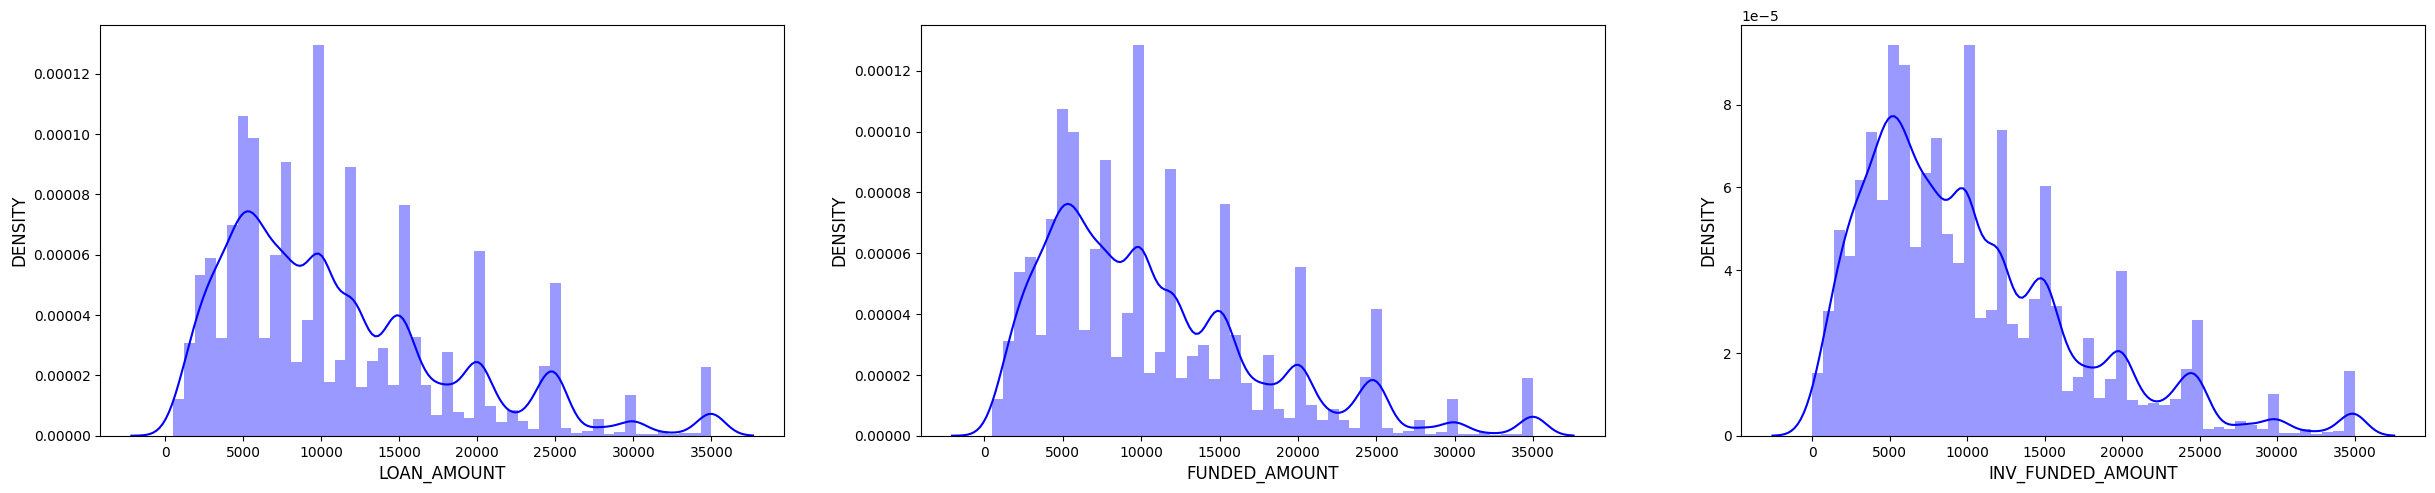

In [24]:
fig = plt.figure(figsize = (30,40))
spec = fig.add_gridspec(6,3)
spec.update(wspace = 0.2, hspace= 0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[0,2])

# Adding color preference
bg_color = 'white'
for selection in [fig, sec_01, sec_02, sec_03]:
  selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03]

cnt = 0 #counter
for feature in ['loan_amnt','funded_amnt','funded_amnt_inv']:
  sns.distplot(data[feature],ax = sec[cnt], color = 'blue')
  sec[cnt].set_ylabel('DENSITY', fontsize =12)
  cnt+=1

sec_01.set_xlabel('LOAN_AMOUNT', fontsize = 12)
sec_02.set_xlabel('FUNDED_AMOUNT',fontsize = 12)
sec_03.set_xlabel('INV_FUNDED_AMOUNT',fontsize =12)

plt.show()

**OBSERVATION**

* Density distribution for all the three features are similar. Hence, we can proceed forward to anlayse with any of the feature.
* Based on the nature by description we will proceed forward with "loan_amnt".

Univarite analysis on Annual Income

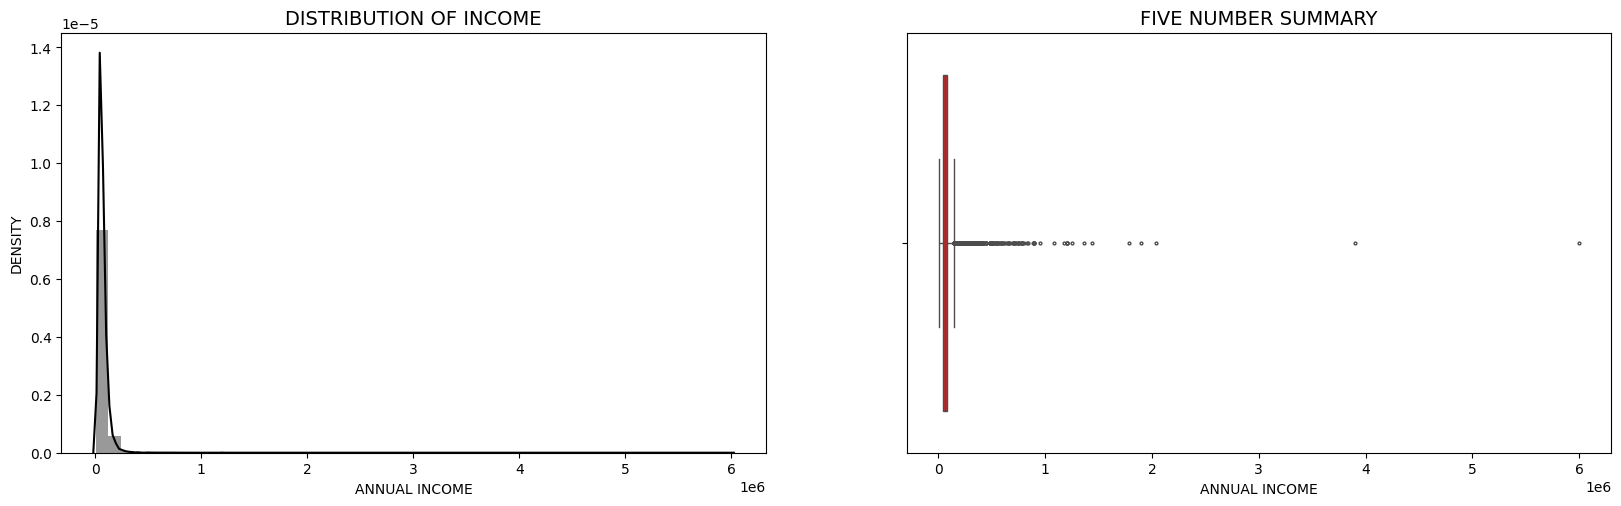

In [25]:
# Distribution plot and oulier plot
# Distribution plot
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
viz = sns.distplot(data['annual_inc'],color='black')
viz.set_title('DISTRIBUTION OF INCOME', fontsize = 14, color = 'black')
viz.set_ylabel('DENSITY',fontsize = 10, color = 'black')
viz.set_xlabel('ANNUAL INCOME',fontsize = 10, color = 'black')

# Outlier plot
plt.subplot(2,2,2)
viz = sns.boxplot(data['annual_inc'],color = 'red',fliersize = 2,orient = 'h')
viz.set_title('FIVE NUMBER SUMMARY',fontsize = 14, color = 'black')
viz.set_xlabel('ANNUAL INCOME',fontsize = 10, color = 'black')
plt.show()

In [26]:
# Numerical summary
print('Numerical Summary: ')
print('Mean: ', data['annual_inc'].mean())
print('Median: ',data['annual_inc'].quantile(0.5))
print('90% DATA: ',data['annual_inc'].quantile(0.9))
print('99% DATA: ',data['annual_inc'].quantile(0.99))
print('100% DATA: ',data['annual_inc'].quantile(1))

Numerical Summary: 
Mean:  68777.97368120901
Median:  58868.0
90% DATA:  115000.0
99% DATA:  234143.99999999878
100% DATA:  6000000.0


Univariate analysis on interest rate

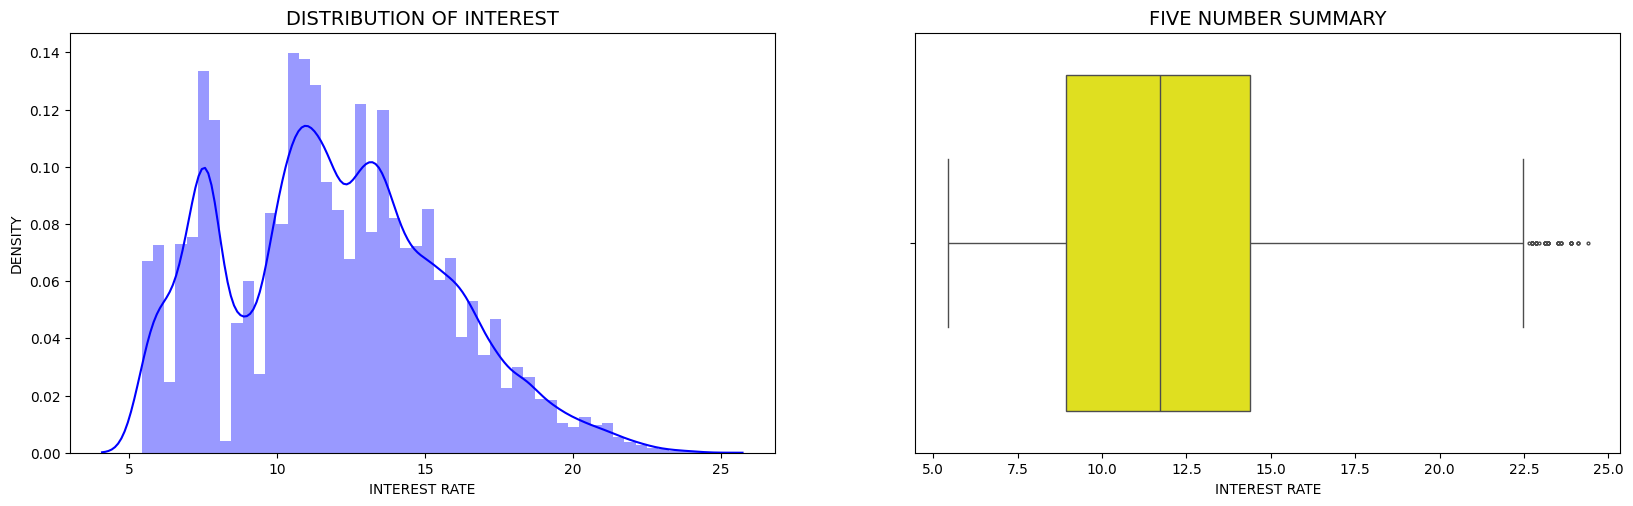

In [27]:
# Distribution plot and outlier plot
# Distribution plot
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
viz = sns.distplot(data['int_rate'],color = 'blue')
viz.set_title('DISTRIBUTION OF INTEREST',fontsize = 14, color = 'black')
viz.set_ylabel('DENSITY',fontsize = 10, color = 'black')
viz.set_xlabel('INTEREST RATE',fontsize = 10, color = 'black')

# outline plot
plt.subplot(2,2,2)
viz = sns.boxplot(data['int_rate'],color = 'yellow',fliersize = 2,orient = 'h')
viz.set_title('FIVE NUMBER SUMMARY',fontsize =14, color = 'black')
viz.set_xlabel('INTEREST RATE',fontsize = 10, color = 'black')
plt.show()

In [28]:
# Numerical summary
print('Numerical summary: ')
print('Average interest rate: ',np.round(data['int_rate'].mean(),1),'%')
print('INTEREST RATE @75 percentile: ',np.round(data['int_rate'].quantile(0.75)),'%')
print('INTEREST RATE @90 percentile: ',np.round(data['int_rate'].quantile(0.9)),'%')
print('INTEREST RATE @99 percentile: ',np.round(data['int_rate'].quantile(0.99)),'%')


Numerical summary: 
Average interest rate:  11.9 %
INTEREST RATE @75 percentile:  14.0 %
INTEREST RATE @90 percentile:  17.0 %
INTEREST RATE @99 percentile:  21.0 %


Univariate analysis on issue month

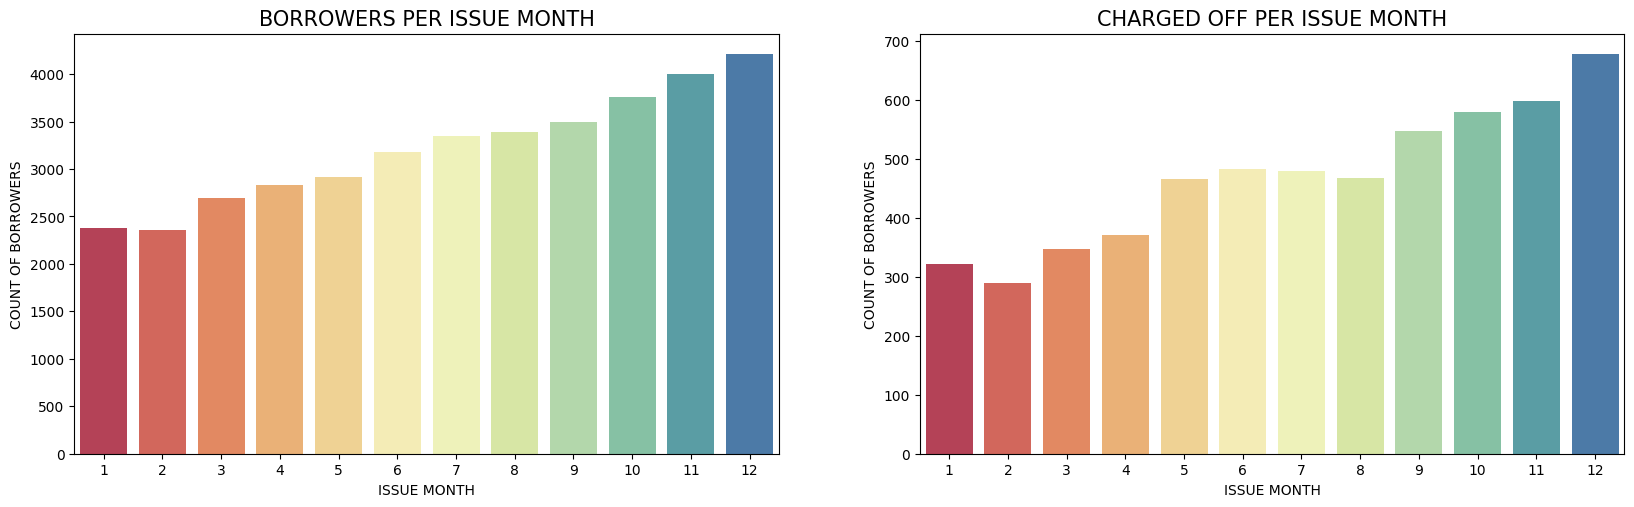

In [34]:
# Count plot for issue month
plt.figure(figsize=(20,12))
plt.subplot(2,2,1)
viz = sns.countplot(x= 'issue_month', data= data,
                    palette = 'Spectral')
viz.set_title('BORROWERS PER ISSUE MONTH', fontsize = 15, color = 'black')
viz.set_ylabel('COUNT OF BORROWERS', fontsize = 10, color ='black')
viz.set_xlabel('ISSUE MONTH', fontsize = 10, color = 'black')

# Count plot of charged off for issue month
plt.subplot(2,2,2)
viz = sns.countplot(x = 'issue_month',palette = 'Spectral',
                    data= data[data['loan_status'] =='Charged Off'])
viz.set_title('CHARGED OFF PER ISSUE MONTH',fontsize = 15, color = 'black')
viz.set_ylabel('COUNT OF BORROWERS',fontsize =10, color = 'black')
viz.set_xlabel('ISSUE MONTH',fontsize = 10, color = 'black')
plt.show()

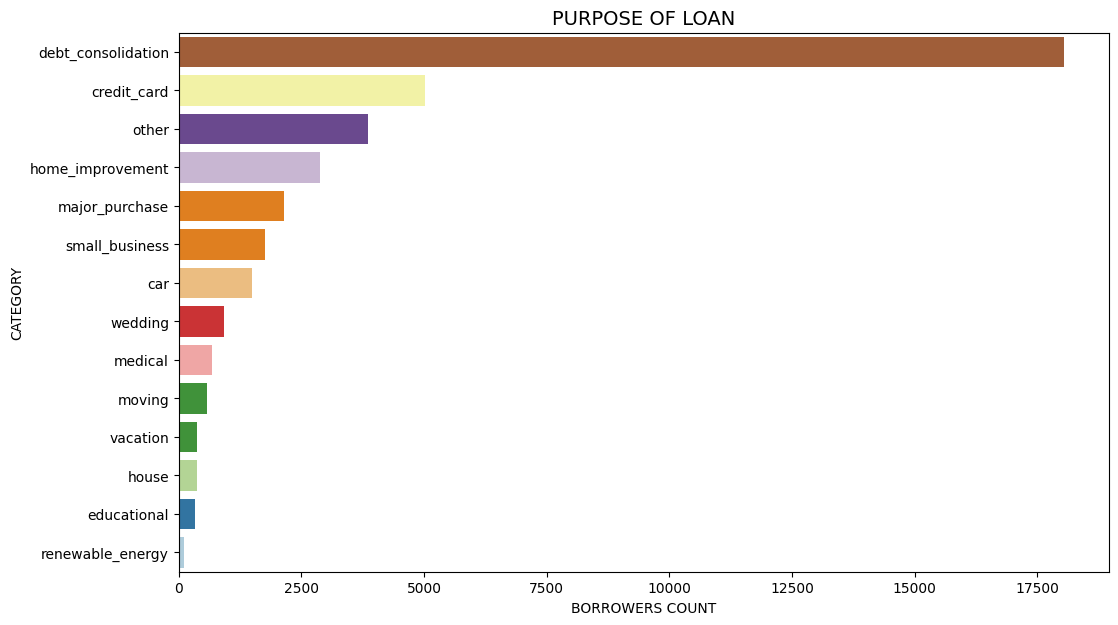

In [35]:
# Countplot for purpose
plt.figure(figsize = (12,7))
viz = sns.countplot(y= data['purpose'],
                    order = data['purpose'].value_counts().index,
                    palette = 'Paired_r')
viz.set_title('PURPOSE OF LOAN', fontsize =14, color ='black')
viz.set_ylabel('CATEGORY',fontsize = 10, color = 'black')
viz.set_xlabel('BORROWERS COUNT', fontsize =10, color = 'black')
plt.show()

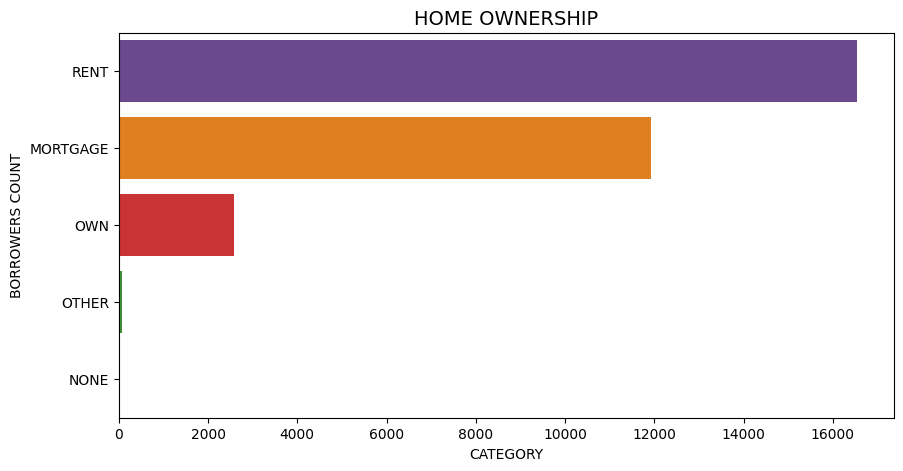

In [40]:
# Countplot for home ownership
plt.figure(figsize=(10,5))
viz = sns.countplot(data['home_ownership'],
                    order=data['home_ownership'].value_counts().index,
                    palette='Paired_r')
viz.set_title('HOME OWNERSHIP',fontsize=14,color='black')
viz.set_xlabel('CATEGORY',fontsize =10,color = 'black')
viz.set_ylabel('BORROWERS COUNT',fontsize =10,color = 'black')
plt.show()



### OBSERVATION ON UNIVARIATE ANALYSIS






* Looks like the feature "annual_inc" has outliers in the upper fence.
* There is a huge jump between 99 and 100 % of data in "annual_inc" and that can be trimmed.
* The average interest rate is 12% but there is huge jump after 75 percentile.
* Most of the borrowers prefer to get loan amount between 5k to 15k.
* Almost of the borrowers gets interest rate between 9% to 14%.
* For each year number of borrowers keeps on increasing and they opt for 36 months tenure.
* Loans approved on Q4 are more likely to default.
* Most of the borrowings happens for debt consolidation and credit card bill payment.
* Very least of the borrowers has a own house.


### OUTLIER TREATMENT

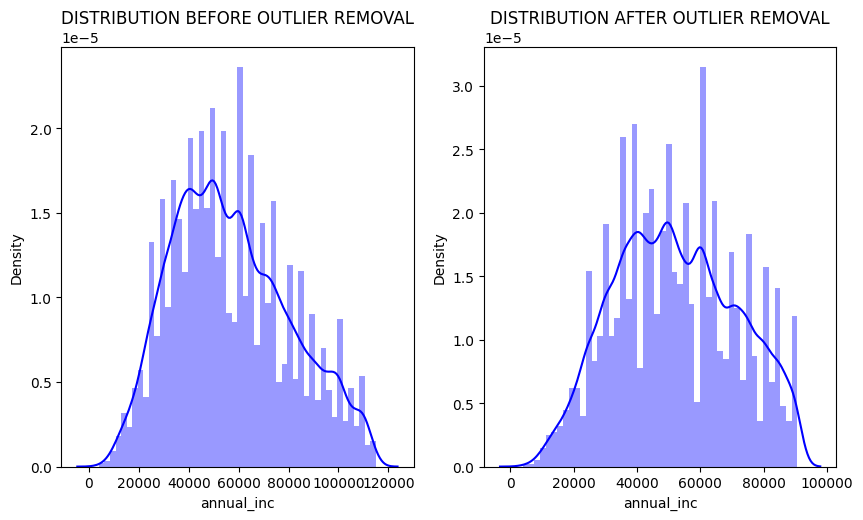

In [39]:
# Removing the data above 99% in upper fendc of annual income

# Distribution plot before outlier removal
plt.figure(figsize = (10,12))
plt.subplot(2,2,1)
ax = sns.distplot(data['annual_inc'],color = 'blue')
ax.set_title('DISTRIBUTION BEFORE OUTLIER REMOVAL')

# REMOVING OUTLIERS
data=data[data['annual_inc']<data['annual_inc'].quantile(0.9)]

# Distribution plot after outlier removal
plt.subplot(2,2,2)
ax = sns.distplot(data['annual_inc'],color = 'blue')
ax.set_title('DISTRIBUTION AFTER OUTLIER REMOVAL')
plt.show()

## **Understanding the financial features**

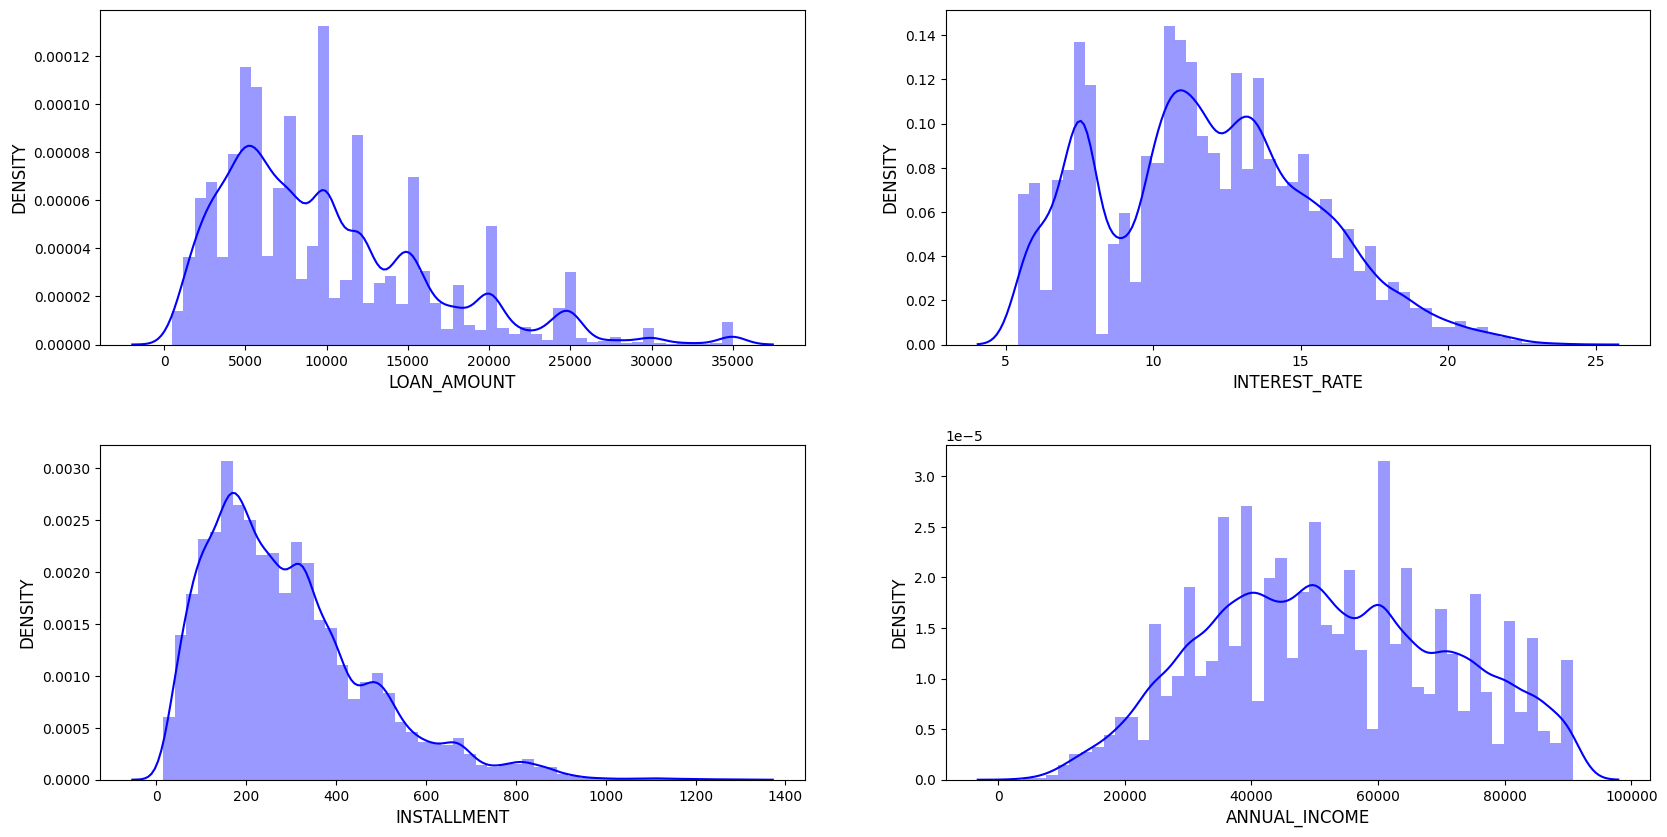

In [41]:
fig = plt.figure (figsize = (20,10))
spec = fig.add_gridspec(2,2)
spec.update(wspace= 0.2, hspace = 0.3)
sec_01 = fig.add_subplot(spec[0,0])
sec_02 = fig.add_subplot(spec[0,1])
sec_03 = fig.add_subplot(spec[1,0])
sec_04 = fig.add_subplot(spec[1,1])

# Adding color preferences
bg_color = 'white'
for selection in [fig, sec_01, sec_02, sec_03, sec_04]:
  selection.set_facecolor(bg_color)

# Plotting the graph
sec = [sec_01, sec_02, sec_03, sec_04]

cnt = 0 #counter
for feature in ['loan_amnt', 'int_rate', 'installment', 'annual_inc']:
  sns.distplot(data[feature],ax = sec[cnt], color = 'blue')
  sec[cnt].set_ylabel('DENSITY', fontsize = 12)
  cnt +=1

# Naming the axis
sec_01.set_xlabel('LOAN_AMOUNT',fontsize =12)
sec_02.set_xlabel('INTEREST_RATE', fontsize = 12)
sec_03.set_xlabel('INSTALLMENT' , fontsize=12)
sec_04.set_xlabel('ANNUAL_INCOME' , fontsize=12)

plt.show()

* Based on the nature of distribution **"loan_amnt", "int_rate", "annual_inc", "installment"** can be bucketed for further analysis.